<style>
h1{color: rgb(255, 26, 26); background-color: rgb(0, 255, 255);}
</style>
<h1><b> IN THIS PROJECT WE ARE GOING TO PREDICT AIR QUALITY INDEX.</b></h1>

# What is Air Pollution? #

Air pollution is nothing but, increase of toxic and harmful material in the air, resulting in contamination of air. These material may be in form of solid, liquid or gaseous substances and released in air due to various activities by human beings causing an adverse effect to natural life.

## How does Air Pollution affect the capital of India? ##

The air quality in Delhi, the capital territory of India, according to a WHO survey of 1,650 world cities, and a survey of 7,000 world cities by the US-based Health Effects Institute in August 2022, is the worst of any major city in the world. It also affects the districts around Delhi. Air pollution in India is estimated to kill about 2 million people every year; it is the fifth largest killer in India. India has the world's highest death rate from chronic respiratory diseases and asthma, according to the WHO. In Delhi, poor quality air irreversibly damages the lungs of 2.2 million or 50 percent of all children.

## <b> Causes of poor air quality: </b> ##

<ol>
<li> Emissions from Industries and Factories.</li>
<li> The Use of Firecrackers. </li>
<li> Emissions from Construction Sites. </li>
<li> Over-Population. </li>
<li> Emission from Transportation and Motorised Vehicles. </li>
<li> Stubble Burning in Agricultural Sector. </li>
</ol>

## Building A Model to Predict AQI ##

### We need to import requred Libraries ###

In [1]:
# Importing the required libraries

# for data preprocessing and working with csv
import pandas as pd

# for linear algebra
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# for linear regression analysis
from sklearn.linear_model import LinearRegression

# for data splitting
from sklearn.model_selection import train_test_split
# for model validation
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

# for display image
from IPython.display import Image

## According to Air Quality Index (AQI) ##

### Delhi Average Air Quality: ###

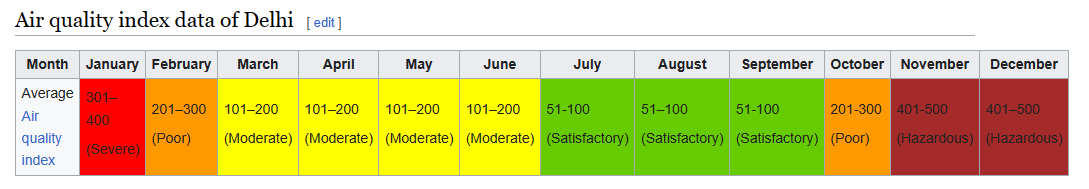

In [2]:
Image('..\Images\AQI Delhi.png')

## We want to calculate AQI  ##

For this study we need help of variours data sets.
Our goal is to Achieve AQI of Delhi.

### Importing Delhi Air Quality Data from a Csv File ###

In [13]:
# Reading Data to a Pandas Data Frame
Delhi_AQ = pd.read_csv('..\Cities Data\delhi_aqi.csv')

In [14]:
# Printing 1st five rows
Delhi_AQ.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61


### Summary of Data Frame ###

In [15]:
Delhi_AQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    18776 non-null  object 
 1   co      18776 non-null  float64
 2   no      18776 non-null  float64
 3   no2     18776 non-null  float64
 4   o3      18776 non-null  float64
 5   so2     18776 non-null  float64
 6   pm2_5   18776 non-null  float64
 7   pm10    18776 non-null  float64
 8   nh3     18776 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


Looks like there are no null values in our Data Frame. Let's check further :-

In [17]:
Delhi_AQ.isnull().sum()

date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64

### Checking Duplicate Values ###

In [21]:
Delhi_AQ[Delhi_AQ.duplicated()]

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3


Ok. We don't have any Duplicate values.

## Let's understand the Data Frame ##

### 1st 23 rows Printed ###

In [27]:
Delhi_AQ.iloc[:24]

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61
5,2020-11-25 06:00:00,3898.62,28.39,117.90,40.05,101.09,437.25,511.79,42.05
6,2020-11-25 07:00:00,1949.31,14.53,105.56,83.69,185.01,312.76,349.20,12.79
7,2020-11-25 08:00:00,1508.71,11.62,112.41,87.98,217.44,275.53,303.47,6.59
8,2020-11-25 09:00:00,1361.85,7.04,109.67,95.84,213.62,263.51,289.86,6.02
9,2020-11-25 10:00:00,1602.17,3.10,93.22,104.43,152.59,271.25,302.27,12.16


Ok, it's look like hourly data.

### Converting to Pandas Date Time ###

In [28]:
Delhi_AQ['date'] = pd.to_datetime(Delhi_AQ['date'])

In [30]:
Delhi_AQ.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61


### Setiing date as Index ###

In [31]:
Delhi_AQ.set_index('date')

,co,no,no2,o3,so2,pm2_5,pm10,nh3
date,,,,,,,,
2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61
...,...,...,...,...,...,...,...,...
2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27
2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12
2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54


## Now, we need some basic knowledge about columns . ##

### What is PM 2.5? ###

Particulate matter, or PM2.5, is very small particles in air that are 2.5 micrometers (about 1 ten-thousandth of an inch) or less in diameter. This is less than the thickness of a human hair. Particulate matter, one of six U.S. EPA criteria air pollutants, is a mixture that can include organic chemicals, dust, soot and metals. These particles can come from cars and trucks, factories, wood burning, and other activities.

PM2.5 is used when describing pollutant levels both outdoor and indoor, where health impact from exposure considers amount of PM2.5 over a 24-hour period. Most studies indicate PM2.5 at or below 12 μg/m 3 is considered healthy with little to no risk from exposure.

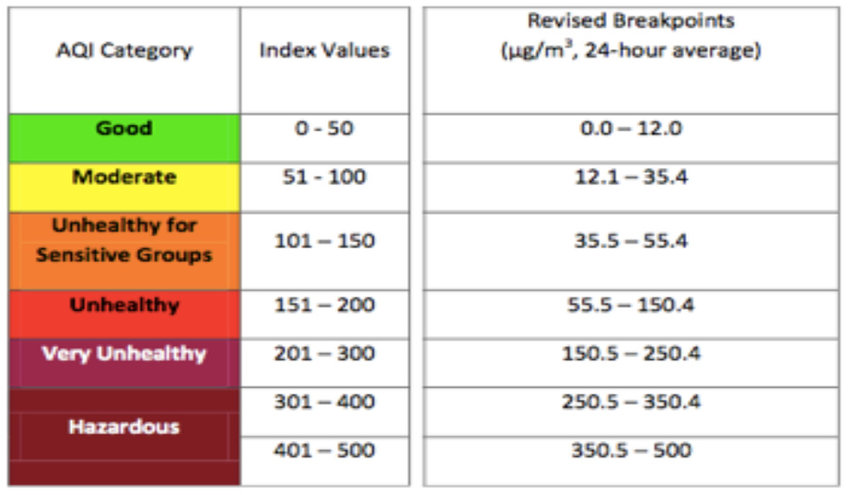

In [32]:
Image('..\Images\PM2.5.png')